<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-de-canciones/blob/main/Laboratorio_2_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de canciones de Spotify**

## Preparacíon

In [359]:
# Importamos las bibliotecas que sabemos que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [360]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [361]:
# Path de la carpeta donde tenemos los datos ---> Solo hay que cambiar esta parte
folder = "/content/drive/MyDrive/UNI/Big Data/"

In [362]:
# Carga de datos
df = pd.read_csv(folder + "Canciones_Spotify.csv")
# Elimina las columnas
df = df.drop(['song_title', 'artist','time_signature','Unnamed: 0'], axis=1)
df.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
711,0.001740,0.670,174122,0.848,0.001680,0,0.385,-5.103,0,0.0537,124.029,0.460,1
609,0.000031,0.610,420384,0.907,0.698000,11,0.230,-5.857,0,0.0384,112.007,0.397,1
1729,0.468000,0.578,201280,0.375,0.000000,0,0.156,-12.951,1,0.0272,89.605,0.561,0
1961,0.007690,0.771,197933,0.812,0.001300,10,0.370,-6.113,0,0.1330,97.721,0.524,0
1485,0.077100,0.709,225253,0.782,0.000005,7,0.302,-3.526,0,0.0469,102.032,0.706,0


## Hipótesis
Haciendo varias cargas de parámetros de manera aleatoria de entre 5 a 10 conjunto de datos. Se analizó manualmente los parámetros que mejor coincidieran. De esta manera que llego a la hipótesis de que:

> Al usuario generalmente le gustan las canciones más bailables, con valores de volumen alto y que tanto la energía como la valencia de estas canciones superan o están al rededor de los 0.5.

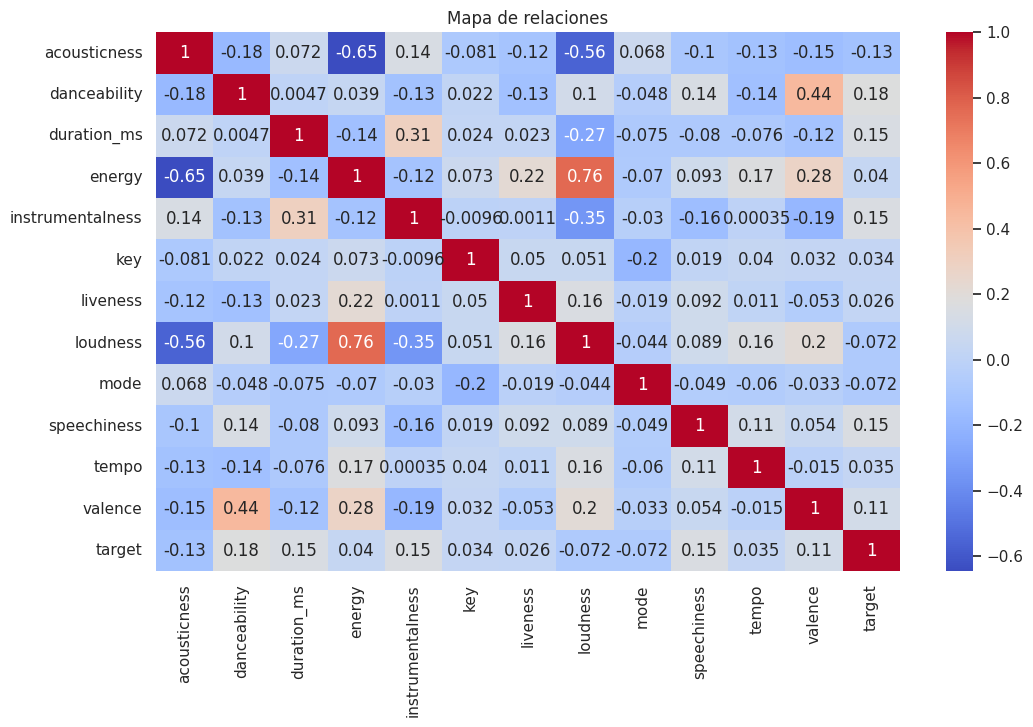

In [363]:
# Gráfico de mapa de calor
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de relaciones')
plt.show()

Para no quedarnos solo con un análisis humano, entrecruzamos las variables para determinar los mayores puntos de relación. Concluyendo que los de mejores correlaciones son los Energy y Loudness, y en segundo lugar los Danceability y Valance.

In [364]:
# Parametros considerados
selected_features = df[["danceability", "energy", "valence", "loudness"]]

In [365]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = selected_features
y = df["target"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Realizar varios modelos de Machine Learning:

In [366]:
# Cargamos de Modelos de Aprendizaje Automático
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Creación del modelo y ajuste (entrenamiento)
knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Entrenar los modelos con los datos
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

## Realizar algún tipo de validación:

Hasta acá, lo que se visualizan en los modelos es que las muestras son
positivas para nuestra hipótesis inicial. Lo que continúa es validar los resultados, ajustarlos si es necesario y ver la precisión de los mismos.

---



In [367]:
from sklearn.model_selection import cross_val_score

# Validación cruzada k-fold
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Muestra los puntajes promedio de validación cruzada para cada modelo
print("K-Nearest Neighbors (KNN) - Puntaje promedio:", knn_scores.mean())
print("Support Vector Machines (SVM) - Puntaje promedio:", svm_scores.mean())
print("Árbol de decisión - Puntaje promedio:", dt_scores.mean())
print("Naive Bayes - Puntaje promedio:", nb_scores.mean())

K-Nearest Neighbors (KNN) - Puntaje promedio: 0.6354652616195219
Support Vector Machines (SVM) - Puntaje promedio: 0.6354421860277292
Árbol de decisión - Puntaje promedio: 0.5964059765782743
Naive Bayes - Puntaje promedio: 0.5883333653827665


In [368]:
# Otro modelo ---> Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # Clasificador
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

0.6311881188118812

## Evaluación y análisis del rendimiento de cada modelo:

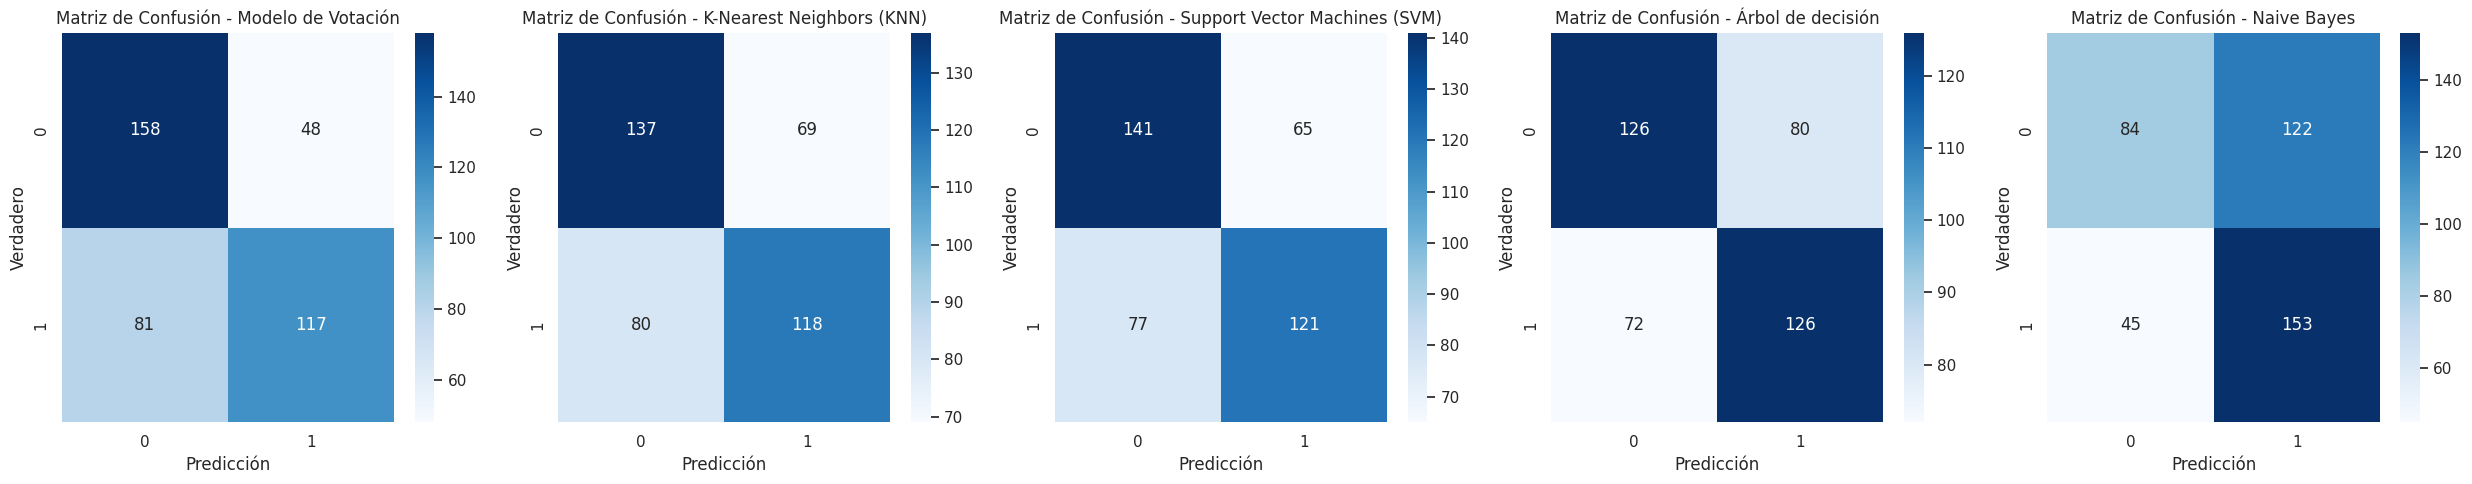

In [369]:
# Predicciones del modelo de votación
y_pred_voting = voting_model.predict(X_test)

# Predicciones de cada modelo individual
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

def Matriz_confusion_grafica(y_true, y_pred, model_name, ax):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Visualizar la matriz de confusión con Seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Matriz de Confusión - {model_name}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Verdadero")

# Crear una figura con subplots organizados en una fila
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

Matriz_confusion_grafica(y_test, y_pred_voting, "Modelo de Votación", axes[0])
Matriz_confusion_grafica(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)", axes[1])
Matriz_confusion_grafica(y_test, y_pred_svm, "Support Vector Machines (SVM)", axes[2])
Matriz_confusion_grafica(y_test, y_pred_dt, "Árbol de decisión", axes[3])
Matriz_confusion_grafica(y_test, y_pred_nb, "Naive Bayes", axes[4])

plt.tight_layout()
plt.show()

## Ajustar para cada uno de los modelos los hiper parámetros:

In [370]:
# Ajuste de Hiperparámetros para ver si podemos mejorar su rendimiento
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas ajustar para cada modelo
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
dt_param_grid = {'max_depth': [None, 5, 10, 15]}
nb_param_grid = {}  # No hay hiperparámetros para ajustar en Naive Bayes

# Crear objetos GridSearchCV para cada modelo
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5)
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5)
nb_grid = nb_model  # No se ajustan hiperparámetros en Naive Bayes

# Realizar el ajuste de hiperparámetros
knn_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_knn_params = knn_grid.best_params_
best_svm_params = svm_grid.best_params_
best_dt_params = dt_grid.best_params_

In [371]:
# Crear un modelo de votación mayoritaria
voting_model = VotingClassifier(estimators=[
    ('KNN', knn_model),
    ('SVM', svm_model),
    ('DecisionTree', dt_model),
    ('NaiveBayes', nb_model)
], voting='hard')  # 'hard' significa votación por mayoría

# Entrenar el modelo de votación con los datos de entrenamiento
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()), ('SVM', SVC()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB())])

## Realizar un ensamble de los modelos:

In [372]:
# Función para imprimir métricas
def print_metrics(y_true, y_pred, model_name):
    print(f"Modelo: {model_name}")
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("\n")

# Imprimir métricas para el modelo de votación
print_metrics(y_test, y_pred_voting, "Modelo de Votación")

# Imprimir métricas para cada modelo individual
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
print_metrics(y_test, y_pred_svm, "Support Vector Machines (SVM)")
print_metrics(y_test, y_pred_dt, "Árbol de decisión")
print_metrics(y_test, y_pred_nb, "Naive Bayes")

Modelo: Modelo de Votación
Precisión: 0.7090909090909091
Recall: 0.5909090909090909
F1-Score: 0.6446280991735537
Exactitud (Accuracy): 0.6806930693069307


Modelo: K-Nearest Neighbors (KNN)
Precisión: 0.6310160427807486
Recall: 0.5959595959595959
F1-Score: 0.612987012987013
Exactitud (Accuracy): 0.6311881188118812


Modelo: Support Vector Machines (SVM)
Precisión: 0.6505376344086021
Recall: 0.6111111111111112
F1-Score: 0.6302083333333334
Exactitud (Accuracy): 0.6485148514851485


Modelo: Árbol de decisión
Precisión: 0.6116504854368932
Recall: 0.6363636363636364
F1-Score: 0.6237623762376238
Exactitud (Accuracy): 0.6237623762376238


Modelo: Naive Bayes
Precisión: 0.5563636363636364
Recall: 0.7727272727272727
F1-Score: 0.6469344608879493
Exactitud (Accuracy): 0.5866336633663366




In [373]:
from sklearn.ensemble import VotingClassifier

def create_ensemble(models, voting='hard'):

    ensemble = VotingClassifier(estimators=models, voting=voting)
    return ensemble

In [374]:
# Ajusta tus modelos con los mejores hiperparámetros
best_knn = KNeighborsClassifier(n_neighbors=5)
best_svm = SVC(C=1.0, kernel='rbf')
best_dt = DecisionTreeClassifier(max_depth=3)
best_nb = GaussianNB()

# Crea una lista de tuplas con el nombre del modelo y el modelo ajustado
models = [('KNN', best_knn), ('SVM', best_svm), ('Decision Tree', best_dt), ('Naive Bayes', best_nb)]

# Crea el ensemble
ensemble = create_ensemble(models, voting='hard')

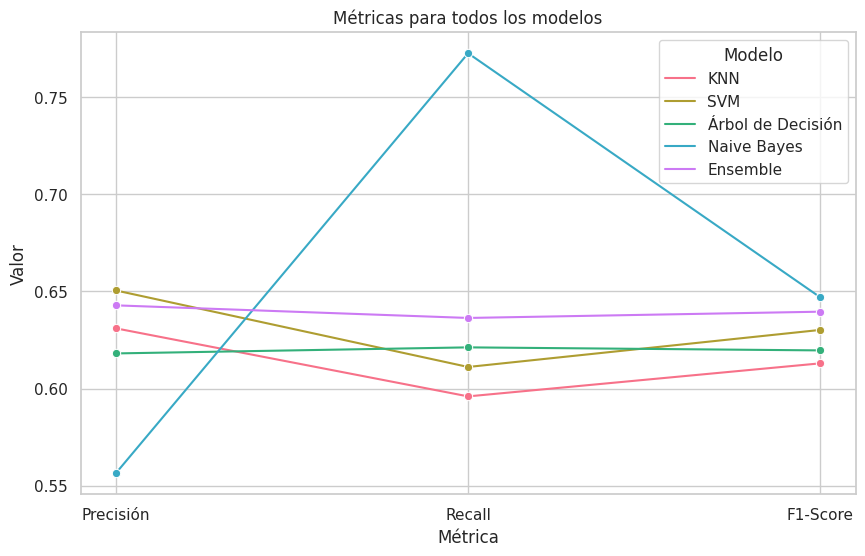

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con todas las métricas para todos los modelos
all_metrics = pd.DataFrame({
    'Modelo': ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes', 'Ensemble'],
    'Precisión': [precision_knn, precision_svm, precision_dt, precision_nb, precision_ensemble],
    'Recall': [recall_knn, recall_svm, recall_dt, recall_nb, recall_ensemble],
    'F1-Score': [f1_knn, f1_svm, f1_dt, f1_nb, f1_ensemble]
})

# Reorganizar los datos para el lineplot
all_metrics = all_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Visualización de todas las métricas en un lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Métrica', y='Valor', hue='Modelo', data=all_metrics, palette='husl', marker='o')
plt.title('Métricas para todos los modelos')
plt.ylabel('Valor')
plt.show()

# Conclucion
Solo considerando los parámetros de "danceability", "energy", "valence", "loudness". Los resultados no tuvieron grades cambios, aun así los resultados pueden ser considerados como positivos para la muestra. Si colocáramos el restante de los parámetros podríamos mejorar él entre cruzamiento de datos. Pero solo para los examinados, los resultados son los positivos dados.